In [2]:
# Import libraries
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [3]:
# load data
dfy = pd.read_csv("labels_train.csv")
y = []
for val in range(dfy.shape[0]):
    y.append(dfy.iloc[val][0])
y = np.asarray(y)

dfx = pd.read_csv("msgs_vec_train.csv")
X = []
for row in range(dfx.shape[0]):
    vec = []
    for val in dfx.iloc[row]:
        vec.append(val)
    X.append(vec)
X = np.asarray(X)
print(y.shape,X.shape)

(21840,) (21840, 500)


In [4]:
# preprocess y data to categories
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
Y.shape
print(Y[5].dtype)
tf.__version__

float64


'2.2.0'

In [60]:
# create a model
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(500, activation='sigmoid'))
# Add another:
model.add(layers.Dropout(0.5))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(100, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(7, activation='softmax'))

In [61]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

METRICS = [ 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      f1_score
]


# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=METRICS)
# model.summary();

# MeanSquaredError 
# CategoricalCrossentropy
# MeanAbsolutePercentageError 
# CategoricalHinge 

In [62]:
# train model
history = model.fit(X, Y, epochs=50, validation_split=0.3, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='loss')])

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

478/478 [==============================] - 3s 5ms/step - loss: 1.7699 - accuracy: 0.2784 - precision: 0.5783 - recall: 0.0698 - auc: 0.6912 - f1_score: 0.1153 - val_loss: 1.4948 - val_accuracy: 0.3887 - val_precision: 0.7230 - val_recall: 0.0777 - val_auc: 0.8046 - val_f1_score: 0.1369
Epoch 2/50
478/478 [==============================] - 2s 5ms/step - loss: 1.4966 - accuracy: 0.4085 - precision: 0.7011 - recall: 0.1938 - auc: 0.7986 - f1_score: 0.2986 - val_loss: 1.3916 - val_accuracy: 0.452

478/478 [==============================] - 2s 5ms/step - loss: 0.7309 - accuracy: 0.7511 - precision: 0.8496 - recall: 0.6706 - auc: 0.9547 - f1_score: 0.7482 - val_loss: 0.9829 - val_accuracy: 0.6756 - val_precision: 0.8193 - val_recall: 0.5646 - val_auc: 0.9210 - val_f1_score: 0.6661
Epoch 27/50
478/478 [==============================] - 2s 5ms/step - loss: 0.7036 - accuracy: 0.7613 - precision: 0.8603 - recall: 0.6859 - auc: 0.9585 - f1_score: 0.7617 - val_loss: 1.0017 - val_accuracy: 0.6647 - val_precision: 0.8093 - val_recall: 0.5764 - val_auc: 0.9190 - val_f1_score: 0.6710
Epoch 28/50
478/478 [==============================] - 2s 5ms/step - loss: 0.7035 - accuracy: 0.7621 - precision: 0.8598 - recall: 0.6825 - auc: 0.9586 - f1_score: 0.7596 - val_loss: 0.9863 - val_accuracy: 0.6835 - val_precision: 0.8204 - val_recall: 0.5857 - val_auc: 0.9219 - val_f1_score: 0.6812
Epoch 29/50
478/478 [==============================] - 2s 5ms/step - loss: 0.6751 - accuracy: 0.7693 - precision: 0

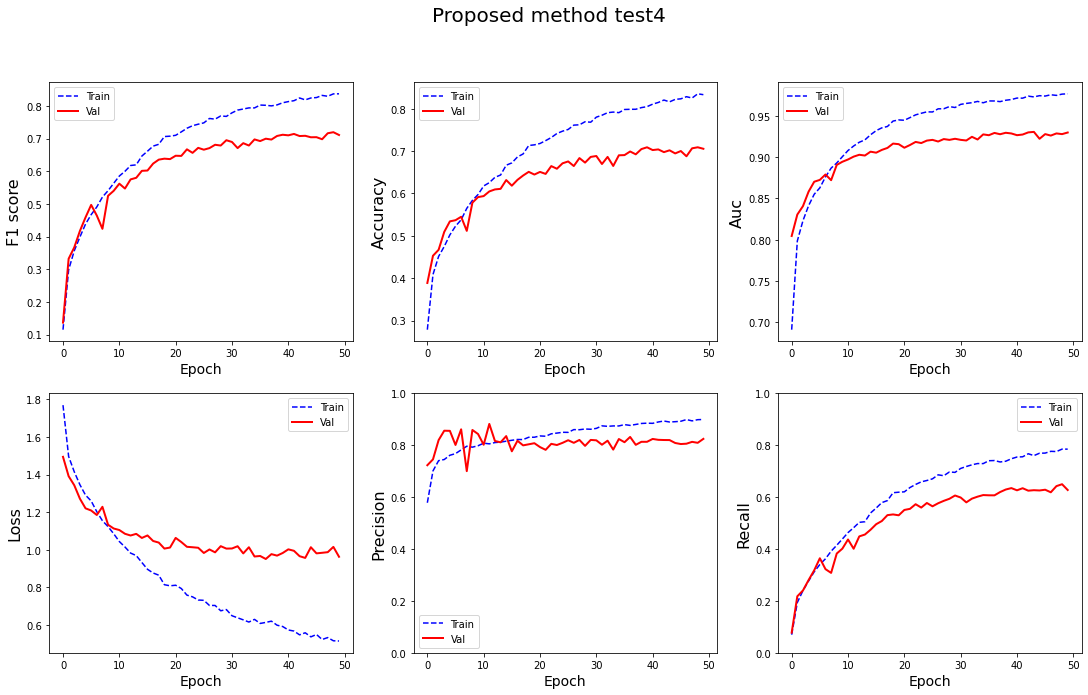

In [63]:
figName = "Proposed method test4"

metrics =  ['f1_score', 'accuracy','auc', 'loss', 'precision', 'recall']
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,3,n+1)
    plt.plot(history.epoch,  history.history[metric], 'b', linestyle="--", label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], 'r', label='Val',linewidth=2.0)
    plt.xlabel('Epoch',fontsize = 14)
    plt.ylabel(name, fontsize = 16)
    if metric == 'precision' or metric == 'recall':
      plt.ylim([0.0,1])
    else:
        plt.ylim([plt.ylim()[0], plt.ylim()[1]])

    plt.legend()
fig.suptitle(figName,fontsize=20)
fig.savefig(figName+'.png')